In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import os
os.chdir('../')

In [2]:
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


In [16]:
NW_data = pd.read_csv("data/scenario_files/nuclear_winter/xia_150tg_y3_swheat.csv")
NW_data.head()

,nation-name,150tg
0,Afghanistan,-100.00
1,Albania,-88.61
2,Algeria,12.15
3,Angola,-90.67
4,Argentina,-30.16


In [18]:
print("The average yield reduction globally is: ", NW_data["150tg"].mean())
print("This considers n = ", len(NW_data), " countries")

The average yield reduction globally is:  -77.24349593495936
This considers n =  123  countries


Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.


Found 7 trade communities.


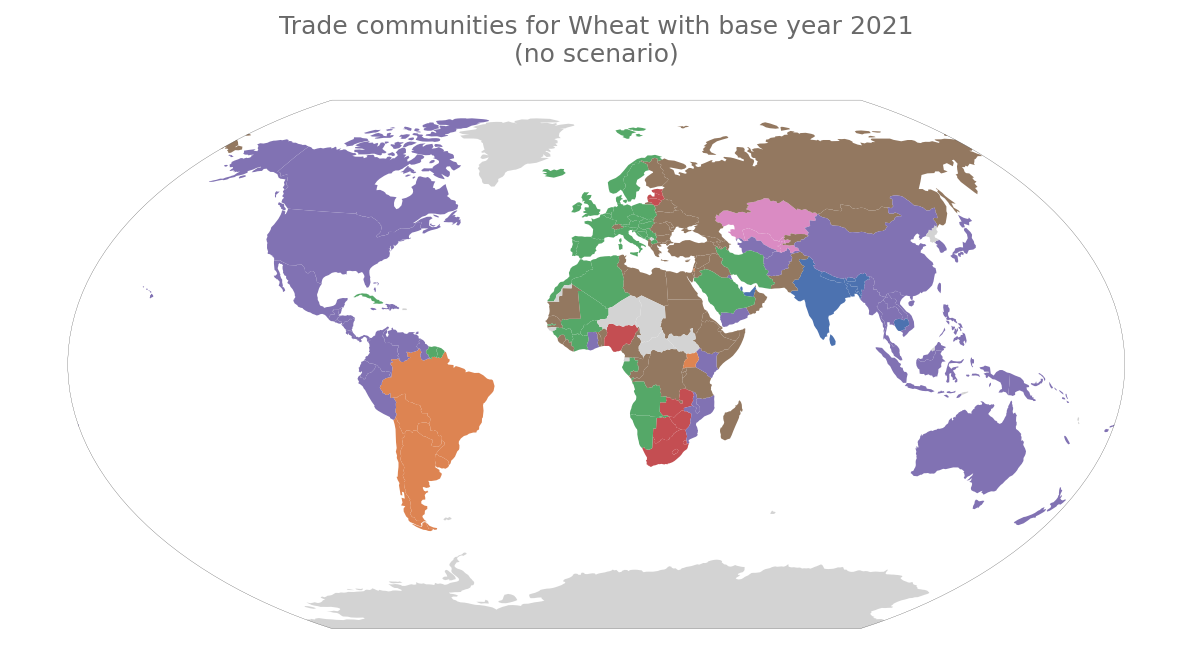

In [4]:
base_wheat = PyTradeShifts(
    "Wheat",
    2021,
    region="Global",
    cd_kwargs={"seed": 2},
    make_plot=True,
)

Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario NW Wheat.
Built trade graph.
Found 20 trade communities.
Keeping communities with only one country.


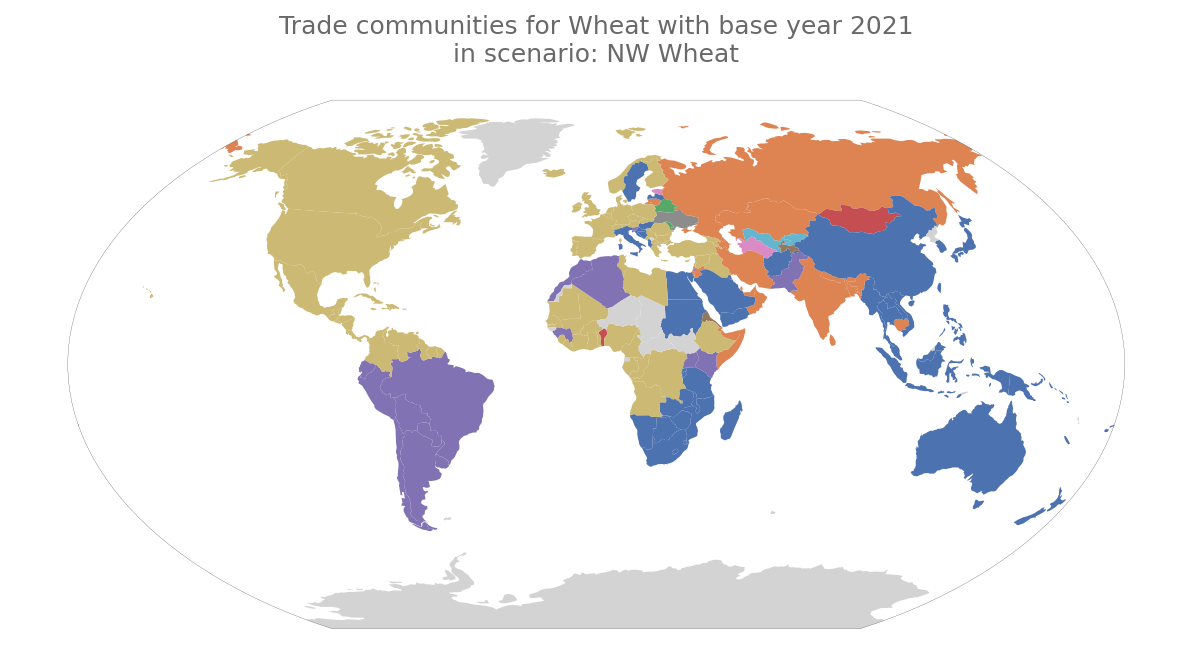

In [5]:
NW_Wheat = PyTradeShifts(
    crop="Wheat",
    region="Global",
    #with_preprocessing=True,
    base_year=2021,
    scenario_file_name="nuclear_winter/xia_150tg_y3_swheat.csv",
    scenario_name="NW Wheat",
    cd_kwargs={"seed": 2},
    keep_singletons=True,
    make_plot=True,
)

In [6]:
comparison = Postprocessing([base_wheat, NW_Wheat], anchor_countries=["China", "Russia", "Germany"])

Starting postprocessing computations...


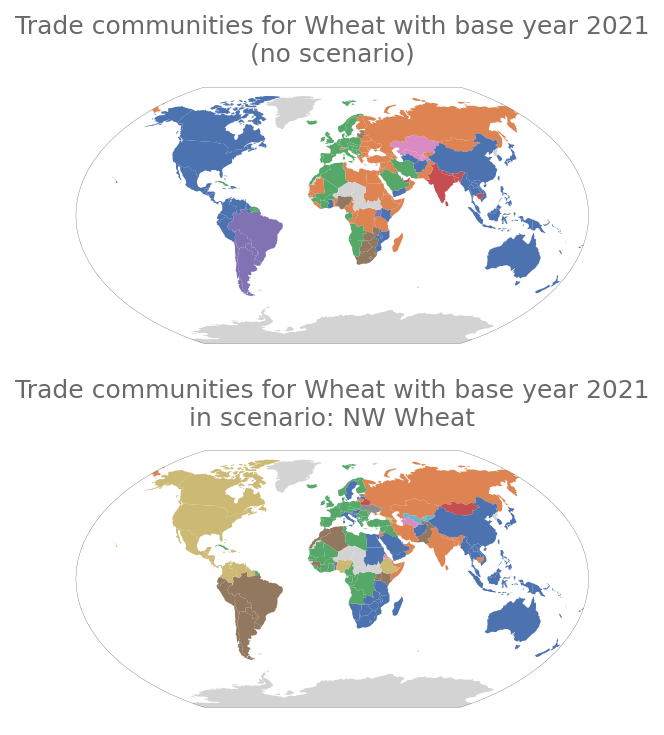

In [7]:
comparison.plot_all_trade_communities()

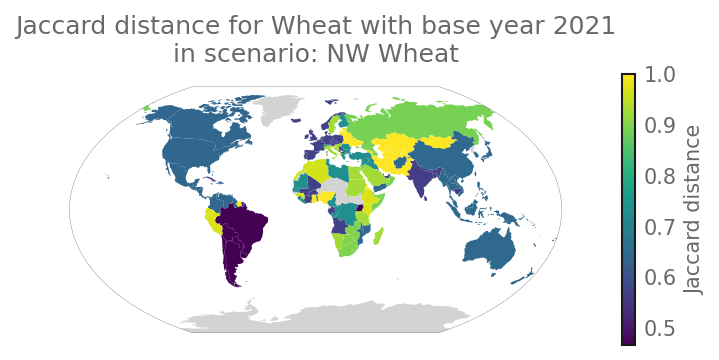

In [8]:
comparison.plot_community_difference()

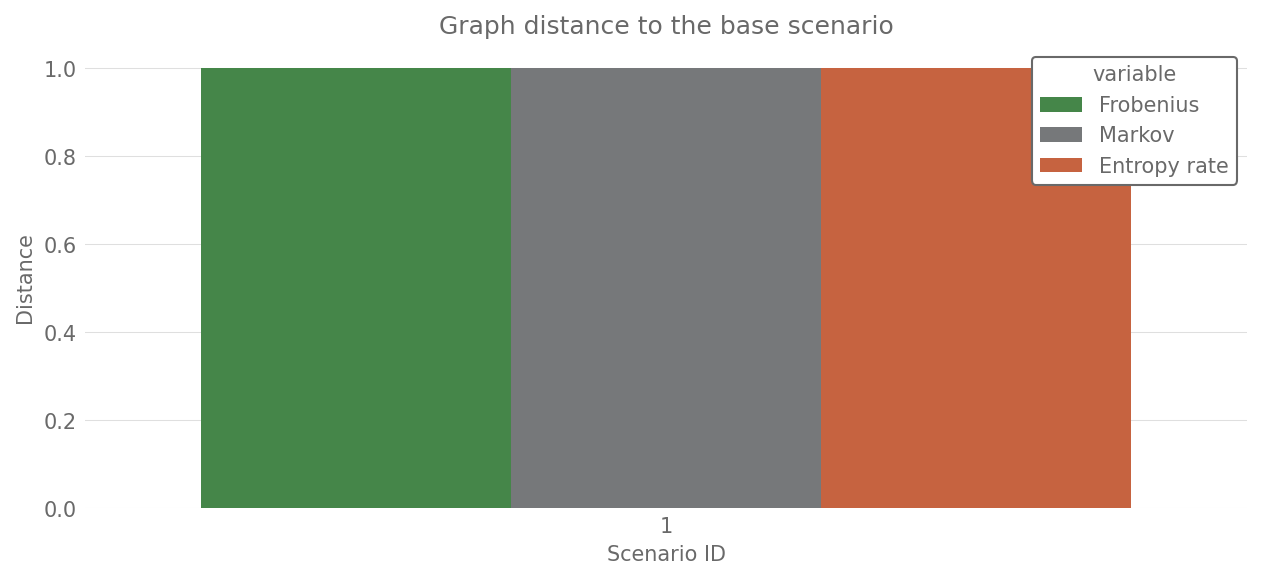

In [9]:
comparison.plot_distance_metrics(frobenius="relative")

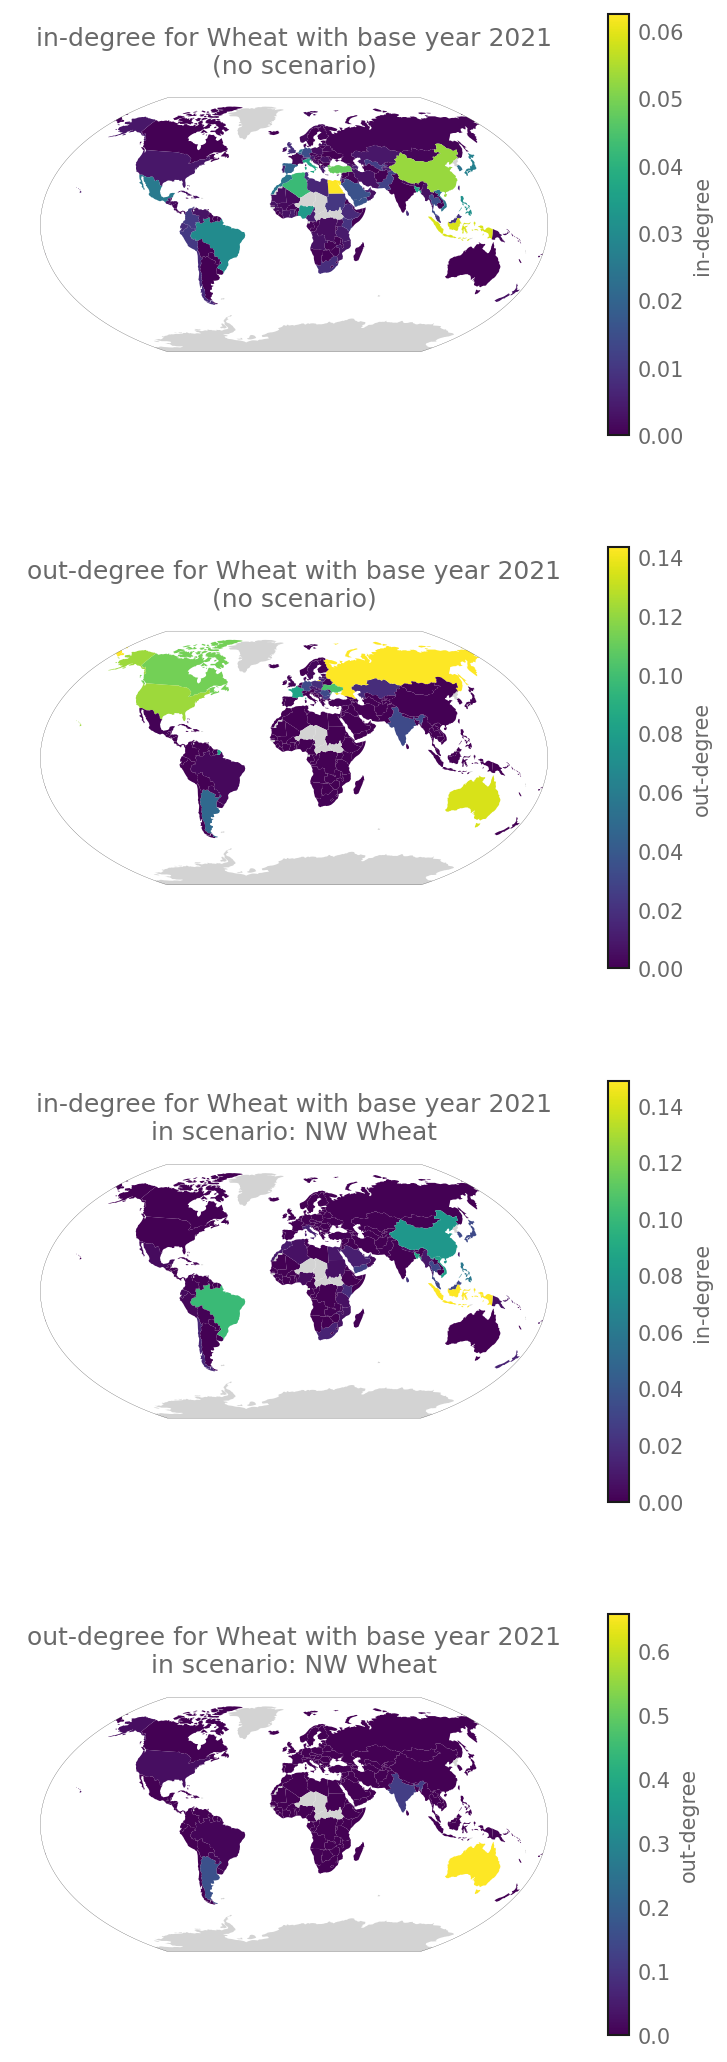

In [10]:
comparison.plot_centrality_maps(figsize=(5, 25), shrink=0.2)

In [11]:
comparison.print_per_community_centrality_metrics(index=False)

***| Degree centrality metrics for the scenario with ID: 0 |***
╒═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│ Smallest    │    Smallest │ Largest     │     Largest │ Smallest     │     Smallest │ Largest      │      Largest │
│ in-degree   │   in-degree │ in-degree   │   in-degree │ out-degree   │   out-degree │ out-degree   │   out-degree │
│ country     │       value │ country     │       value │ country      │        value │ country      │        value │
╞═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ Australia   │ 0           │ Indonesia   │   0.0590339 │ Afghanistan  │            0 │ Australia    │    0.134878  │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ Moldova     │ 7.79805e-06 │ Egypt       │   0.0624968 │ Albania      │            0 │ Russia       │    0.14